In this file, accuracy of the created model was tested using GSE50588 data set. The data set contains the results of 49 TF silencing experiments. See *PLoS Genet. 2014 Mar 6;10(3):e1004226. doi: 10.1371/journal.pgen.1004226* for details. Differential gene expression was analyzed using *'limma'* R package. Genes with Adj. P value >= 0.1 were excluded. Furthermore, cases with less then 10 differentially expressed genes were also excluded. A more detailed explanation can be found in *'model_creation.ipynb'*.

In [1]:
import numpy as np
import pandas as pd
import pyarrow
from IPython.display import clear_output
import pwcal_hsa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from joblib import load

In [2]:
# Load the data set
cases_df = pd.read_parquet('data/50_perturbations.parquet')
cases_df

,species,case,degs,degs_entrez
0,hsa,ARNTL2,"[PSMD8, HINT3, COPG2, RALB, TYMSOS, NARF, SCIM...","[5714, 135114, 26958, 5899, 494514, 26502, 388..."
2,hsa,BCL3,"[ARL2, PPP1R11, BECN1, KAT2B, DAZAP2, LTA, BCL...","[402, 6992, 8678, 8850, 9802, 4049, 102465879,..."
3,hsa,CEBPG,"[CEBPG, USF2, PSAT1, INHBE, DDIT3, CEBPB, SERP...","[1054, 7392, 29968, 83729, 1649, 1051, 5270, 8..."
4,hsa,CEBPZ,"[CEBPZ, PGAM4, HSPD1, SLAMF7, GDF11, CXCL9, SN...","[10153, 441531, 3329, 57823, 10220, 4283, 6633..."
5,hsa,CLOCK,"[CXCL10, MUC6, EXOSC6, ETS1, UBE4A, FAM126B, H...","[3627, 4588, 118460, 2113, 9354, 285172, 3181,..."
6,hsa,CREBBP,"[CREBBP, S100A9, CARHSP1, SCO1, SGK1, CD83, IF...","[1387, 6280, 23589, 6341, 6446, 9308, 3429, 65..."
7,hsa,DIP2B,"[DIP2B, CCL22, IFI27, CCR7, ARL2, ESYT1, FERMT...","[57609, 6367, 3429, 1236, 402, 23344, 10979, 2..."
9,hsa,E2F4,"[E2F4, HIST1H1C, NAPSB, TXN2, HES4, TIPARP, H1...","[1874, 3006, 256236, 25828, 57801, 25976, 8971..."
10,hsa,E2F6,"[CAMP, FAM46C, FCRL4, SLC25A43, LTB, ZNF165, U...","[820, 54855, 83417, 203427, 4050, 7718, 127933..."
11,hsa,EP300,"[FAM46C, LAPTM5, LAX1, ANKRD37, SEL1L3, TXNDC5...","[54855, 7805, 54900, 353322, 23231, 81567, 299..."


In [3]:
# Analysis of the KEGG pathway/GO term overlap for each case for each TF in the library
full_data_df = pwcal_hsa.pwcal(cases_df, exclude_deg_tf=True, n_jobs=7)
full_data_df

 7 processes started...
Finished


,case_id,case,TF,TF_ids,p_share,all_p,p_score,go_share,all_go,go_score
0,0,ARNTL2,AHR,196,0.25,4,0.026015,0.500000,20,0.755909
1,2,BCL3,AHR,196,0.25,4,0.021237,0.250000,20,0.527531
2,3,CEBPG,AHR,196,0.00,4,0.000000,0.350000,20,1.658235
3,4,CEBPZ,AHR,196,0.50,4,0.035087,0.350000,20,0.229558
4,5,CLOCK,AHR,196,0.00,4,0.000000,0.300000,20,0.454191
...,...,...,...,...,...,...,...,...,...,...
6955,51,TFDP1,BRCA1,672,0.60,10,0.101329,0.596491,57,2.904002
6956,52,TFDP2,BRCA1,672,0.20,10,0.017543,0.280702,57,0.744827
6957,53,TFE3,BRCA1,672,0.50,10,0.050390,0.298246,57,1.442880
6958,56,YY1,BRCA1,672,0.70,10,0.113755,0.543860,57,2.556081


In [4]:
full_data_df = full_data_df[full_data_df['all_p']>2].copy(deep=True)
full_data_df = full_data_df[full_data_df['all_go']>2].copy(deep=True)

In [5]:
# Load TF classification table
tf_families_df = pd.read_parquet('data/tf_families_hsa.parquet')
tf_families_df

,ids
PAS domain factors{1.2.5},"[3091, 9915, 9575, 406, 2034, 405, 196]"
AIRE{5.3.1},[326]
Paired-related HD factors{3.1.3},"[84839, 5309, 80712, 30062, 5308, 5015, 338917..."
Steroid hormone receptors (NR3){2.1.1},"[367, 2101, 2908, 2099, 2104, 5241, 4306, 2100..."
AP-2{1.3.1},"[83741, 7022, 7021, 7020]"
...,...
TEF-1-related factors{3.6.1},"[7003, 7004, 7005, 8463]"
CP2-related factors{6.7.2},"[7024, 7342]"
THAP-related factors{2.9.1},"[57215, 55145]"
XBP-1-related factors{1.1.5},[7494]


In [6]:
# Tables of TF-gene interactions
transfac_df = pd.read_parquet('data/tf_matrix_transfac.parquet')
chea_df = pd.read_parquet('data/tf_matrix_chea.parquet')

# Calculate relative interaction frequencies for each family for each group
tf_group_scores_df = pd.DataFrame(columns=['case', 'family', 'transfac','chea'])
for c in cases_df.index:
    case_ids = [str(g) for g in cases_df.at[c, 'degs_entrez']]
    for f in tf_families_df.index:
        tf_ids = tf_families_df.at[f, 'ids']
        # Transfac
        t_value = 0.0
        t_tf_ids = [t for t in tf_ids if t in transfac_df.columns]
        t_g_ids = [h for h in case_ids if h in transfac_df.index]    
        if (len(t_tf_ids) > 0) & (len(t_g_ids) > 0):
            t_value = (transfac_df.loc[t_g_ids, t_tf_ids].sum().sum() / len(t_g_ids)) / \
                (transfac_df[t_tf_ids].sum().sum() / len(transfac_df))
        # Chea
        c_value = 0.0
        c_tf_ids = [c for c in tf_ids if c in chea_df.columns]
        c_g_ids = [h for h in case_ids if h in chea_df.index]    
        if (len(c_tf_ids) > 0) & (len(c_g_ids) > 0):
            c_value = (chea_df.loc[c_g_ids, c_tf_ids].sum().sum() / len(c_g_ids)) / \
                (chea_df[c_tf_ids].sum().sum() / len(chea_df))
        tf_group_scores_df.loc[len(tf_group_scores_df)] = [c, f, t_value, c_value]
        
# Create TF to TF family association table
tf_family_pairs = pd.DataFrame(columns=['family'])
for i in tf_families_df.index:
    for tf in tf_families_df.at[i, 'ids']:
        tf_family_pairs.loc[tf] = [i]
        
# Assign values to full_data_df
full_data_df['transfac'] = 0.0
full_data_df['chea'] = 0.0
for i in full_data_df.index:
    clear_output()
    print(i)
    tf_id = str(full_data_df.at[i, 'TF_ids'])
    case_id = full_data_df.at[i, 'case_id']
    if tf_id in tf_family_pairs.index:
        family = tf_family_pairs.at[tf_id, 'family']
        full_data_df.at[i, 'transfac'] = tf_group_scores_df[(tf_group_scores_df['case']==case_id) & \
                                            (tf_group_scores_df['family']==family)]['transfac'].values[0]
        full_data_df.at[i, 'chea'] = tf_group_scores_df[(tf_group_scores_df['case']==case_id) & \
                                        (tf_group_scores_df['family']==family)]['chea'].values[0]
    # If TF is not in the TF families, calculate individual values
    else:
        case_ids = cases_df.at[full_data_df.at[i, 'case_id'], 'degs_entrez']
        case_ids = [str(g) for g in case_ids]

        t_value = 0.0
        t_g_ids = [h for h in case_ids if h in transfac_df.index]    
        if (tf_id in transfac_df.columns) & (len(t_g_ids) > 0):
            t_value = (transfac_df.loc[t_g_ids, tf_id].sum().sum() / len(t_g_ids)) / \
                (transfac_df[tf_id].sum().sum() / len(transfac_df))
            full_data_df.at[i, 'transfac'] = t_value 

        c_value = 0.0
        c_g_ids = [h for h in case_ids if h in chea_df.index]    
        if (tf_id in chea_df.columns) & (len(c_g_ids) > 0):
            c_value = (chea_df.loc[c_g_ids, tf_id].sum().sum() / len(c_g_ids)) / \
                (chea_df[tf_id].sum().sum() / len(chea_df))
            full_data_df.at[i, 'chea'] = c_value 
print('Finished')

# Fill zeroes if only one ('chea' or 'transfac') value is available
for i in full_data_df.index:
    if full_data_df.at[i, 'chea'] == 0.0:
        full_data_df.at[i, 'chea'] = full_data_df.at[i, 'transfac']
    if full_data_df.at[i, 'transfac'] == 0.0:
        full_data_df.at[i, 'transfac'] = full_data_df.at[i, 'chea'] 

6959
Finished


In [7]:
# Add column with class labels (0 and 1)
full_data_df['label']=0
for i in full_data_df.index:
    tf_id = full_data_df.at[i, 'TF_ids']
    case_id = full_data_df.at[i, 'case_id']
    case_ids = cases_df.at[case_id, 'degs_entrez']
    if tf_id in case_ids:
        full_data_df.at[i, 'label'] = 1

In [8]:
rf_model = load('data/rf_mod.joblib')
full_data_df['rf_score'] = rf_model.predict_proba(
                            full_data_df[['TF_ids',
                            'p_share','all_p',
                            'p_score', 
                            'go_share','all_go', 
                            'go_score',
                            'transfac','chea'
                            ]].values)[:,[1]]

# Predictions of RF model
fpr_rf, tpr_rf, _ = roc_curve(full_data_df['label'].values,
                              full_data_df['rf_score'].values)
roc_auc = auc(fpr_rf, tpr_rf)
roc_auc

0.7775455967120348

In [9]:
log_model = load('data/log_mod.joblib') 
fpr_l, tpr_l, _ = roc_curve(full_data_df['label'].values, 
                            log_model.predict_proba(full_data_df[['p_share',
                                                                  'p_score', 
                                                                  'go_share',
                                                                  'go_score',
                                                                  'rf_score'
                                                                 ]].values)[:,[1]])
# Predictions of logistic regression model with RF probabilities included
roc_auc = auc(fpr_l, tpr_l)
roc_auc

0.8700392012703502

In [10]:
full_data_df['lr_score'] = log_model.predict_proba(full_data_df[['p_share',
                                                                  'p_score', 
                                                                  'go_share',
                                                                  'go_score',
                                                                  'rf_score'
                                                                 ]].values)[:,[1]]
max_rf = full_data_df['rf_score'].max()
full_data_df['rf_score_norm'] = full_data_df['rf_score'].apply(lambda x: x/max_rf)
max_lr = full_data_df['lr_score'].max()
full_data_df['lr_score_norm'] = full_data_df['lr_score'].apply(lambda x: x/max_lr)
full_data_df['mean_score'] = 0.0
for i in full_data_df.index: 
    full_data_df.at[i, 'mean_score'] = np.mean([full_data_df.at[i, 'rf_score_norm'], full_data_df.at[i, 'lr_score_norm']])
fpr_m, tpr_m, _ = roc_curve(full_data_df['label'].values, full_data_df['mean_score'].values)
roc_auc = auc(fpr_m, tpr_m)
roc_auc

0.8566577376558183

In [11]:
# Use bootstrapping to average the logistic regression predictions
total_fpr= []
total_tpr = []
total_auc = []
avg_precision = []
total_precision = []
total_recall= []
n_samples = 5000
for i in range(n_samples):
    clear_output()
    print(i)
    sample_df = full_data_df.sample(frac=0.8).copy(deep=True)
    y_test = sample_df['label'].values
    y_pred = log_model.predict_proba(sample_df[['p_share',
                                                'p_score', 
                                                'go_share',
                                                'go_score',
                                                'rf_score']].values)[:,[1]]
    # Downsampling negative class
    labels = y_test[y_test>0]
    probs = y_pred[y_test>0]
    inds = np.array([i for i in range(len(y_test))])
    neg_inds = np.random.choice(inds[y_test==0], size=len(labels), replace=False)
    labels = np.concatenate([labels, y_test[neg_inds]], axis=0)
    probs = np.concatenate([probs, y_pred[neg_inds]], axis=0)
    
    # Saving values
    precision, recall, _ = precision_recall_curve(labels, probs, pos_label=1)
    total_precision.append(precision)
    total_recall.append(recall)
    avg_precision.append(average_precision_score(labels, probs, pos_label=1))
    fpr, tpr,_ = roc_curve(labels, probs, pos_label=1)
    total_fpr.append(fpr)
    total_tpr.append(tpr)
    total_auc.append(auc(fpr, tpr))
    
total_fpr = np.hstack(total_fpr)
total_tpr = np.hstack(total_tpr)
total_precision = np.hstack(total_precision)
total_recall = np.hstack(total_recall)
clear_output()
print('Finished')

Finished


In [12]:
np.mean(total_auc)

0.8698455027451393

In [13]:
np.std(total_auc)

0.017263962665800256

In [14]:
np.mean(avg_precision)

0.8702935124331016

In [15]:
np.std(avg_precision)

0.02366793530469723

In [16]:
# bin TPR values to smooth ROC curve
n_points = 100
tpr_order =  np.argsort(total_tpr)
total_tpr = total_tpr[tpr_order]
total_fpr = total_fpr[tpr_order]
inter_fpr = np.linspace(0, 1, n_points)
inter_tpr = np.zeros(n_points)
sd_tpr = np.zeros(n_points)
for i in range(n_points-1):
    inter_tpr[i+1] = np.nanmean(total_tpr[np.logical_and(total_fpr >= inter_fpr[i], total_fpr < inter_fpr[i+1])])
    sd_tpr[i+1] = np.std(total_tpr[np.logical_and(total_fpr >= inter_fpr[i], total_fpr < inter_fpr[i+1])]) 

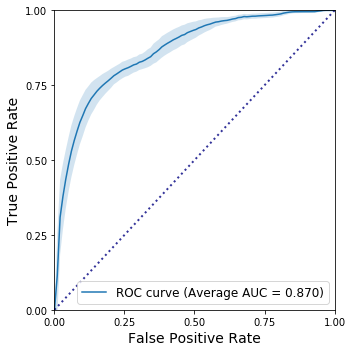

In [17]:
plt.figure(figsize=(5,5))
sns.lineplot(inter_fpr, inter_tpr,  ci=None, 
             label='ROC curve (Average AUC = %0.3f)' % np.mean(total_auc), 
             estimator='mean')
plt.fill_between(inter_fpr, inter_tpr-sd_tpr, inter_tpr+sd_tpr, alpha = 0.2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':',alpha = 0.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
#plt.savefig('images/test_ROC.png',dpi=300, quality=100)

In [18]:
# bin Precision values to smooth PR curve
n_points = 100
precision_order =  np.flip(np.argsort(total_precision))
total_precision = total_precision[precision_order]
total_recall = total_recall[precision_order]
inter_recall = np.linspace(0, 1, n_points)
inter_precision = np.zeros(n_points)
sd_precision = np.zeros(n_points)
for i in range(n_points-1):
    inter_precision[i] = np.nanmean(total_precision[np.logical_and(total_recall > \
                                inter_recall[i], total_recall <= inter_recall[i+1])]) 
    sd_precision[i] = np.std(total_precision[np.logical_and(total_recall > \
                                inter_recall[i], total_recall <= inter_recall[i+1])])
inter_precision[n_points-1]=np.nan

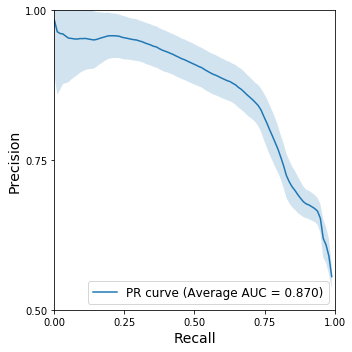

In [19]:
plt.figure(figsize=(5,5))
sns.lineplot(inter_recall, inter_precision, ci=None, 
              label='PR curve (Average AUC = %0.3f)' % np.mean(avg_precision),
             estimator=None)
plt.fill_between(inter_recall, inter_precision-sd_precision, 
                 inter_precision+sd_precision, alpha = 0.2)
plt.xlim([0.0, 1.0])
plt.ylim([0.5, 1.0])
plt.yticks([0.5, 0.75, 1.0])
plt.xticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
#plt.savefig('images/test_PR.png',dpi=300, quality=100)